In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('telegram_messages.csv')
data.head()

,date,text,views,media,reactions,is_forwarded
0,2024-11-15T19:12:59+00:00,"люди, наученные горьким (а для кого-то может и...",128,"{'photos': ['""https://cdn4.telesco.pe/file/Tro...","{'❤️': '12', '🍓': '2'}",False
1,2024-11-23T19:01:50+00:00,мой мир последнюю неделю,88,"{'photos': ['""https://cdn4.telesco.pe/file/bMP...",{'❤️': '12'},False
2,2024-11-25T14:30:07+00:00,пока солнце выкл греться приходится человеческ...,84,"{'photos': ['""https://cdn4.telesco.pe/file/knC...","{'🕊': '13', '❤️': '5', '🔥': '2'}",False
3,2024-11-26T14:23:27+00:00,тетки первый курс вспомнили\n*первое видео обя...,81,"{'photos': [], 'documents': [], 'videos': ['ht...","{'❤️': '12', '🕊': '1'}",True
4,2024-11-28T13:31:42+00:00,а пете-то (УЖЕ!!!) семь вчера стукнуло!🎊,106,"{'photos': ['""https://cdn4.telesco.pe/file/kCF...","{'❤️': '12', '🥰': '5', '🔥': '3'}",False


In [3]:
#convert reactions from string to dictionary
def str_to_dict(d):
    if not isinstance(d, str) or not d.strip().startswith('{'):
        return {}
    temp = d[1:-1].split(', ')
    res = {}
    for item in temp:
        if not item or ': ' not in item:
            continue
        pair = item.split(': ', 1)
        if len(pair) != 2:
            continue
        key = pair[0].strip("'\"")
        value = pair[1].strip("'\"")
        res[key] = int(value) if value.isdigit() else value
    return res

data['reactions'] = data['reactions'].apply(str_to_dict)
data.head()                                                                                               

,date,text,views,media,reactions,is_forwarded
0,2024-11-15T19:12:59+00:00,"люди, наученные горьким (а для кого-то может и...",128,"{'photos': ['""https://cdn4.telesco.pe/file/Tro...","{'❤️': 12, '🍓': 2}",False
1,2024-11-23T19:01:50+00:00,мой мир последнюю неделю,88,"{'photos': ['""https://cdn4.telesco.pe/file/bMP...",{'❤️': 12},False
2,2024-11-25T14:30:07+00:00,пока солнце выкл греться приходится человеческ...,84,"{'photos': ['""https://cdn4.telesco.pe/file/knC...","{'🕊': 13, '❤️': 5, '🔥': 2}",False
3,2024-11-26T14:23:27+00:00,тетки первый курс вспомнили\n*первое видео обя...,81,"{'photos': [], 'documents': [], 'videos': ['ht...","{'❤️': 12, '🕊': 1}",True
4,2024-11-28T13:31:42+00:00,а пете-то (УЖЕ!!!) семь вчера стукнуло!🎊,106,"{'photos': ['""https://cdn4.telesco.pe/file/kCF...","{'❤️': 12, '🥰': 5, '🔥': 3}",False


In [4]:
data.head()

,date,text,views,media,reactions,is_forwarded
0,2024-11-15T19:12:59+00:00,"люди, наученные горьким (а для кого-то может и...",128,"{'photos': ['""https://cdn4.telesco.pe/file/Tro...","{'❤️': 12, '🍓': 2}",False
1,2024-11-23T19:01:50+00:00,мой мир последнюю неделю,88,"{'photos': ['""https://cdn4.telesco.pe/file/bMP...",{'❤️': 12},False
2,2024-11-25T14:30:07+00:00,пока солнце выкл греться приходится человеческ...,84,"{'photos': ['""https://cdn4.telesco.pe/file/knC...","{'🕊': 13, '❤️': 5, '🔥': 2}",False
3,2024-11-26T14:23:27+00:00,тетки первый курс вспомнили\n*первое видео обя...,81,"{'photos': [], 'documents': [], 'videos': ['ht...","{'❤️': 12, '🕊': 1}",True
4,2024-11-28T13:31:42+00:00,а пете-то (УЖЕ!!!) семь вчера стукнуло!🎊,106,"{'photos': ['""https://cdn4.telesco.pe/file/kCF...","{'❤️': 12, '🥰': 5, '🔥': 3}",False


In [5]:
# count total messages and messages per month
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.to_period('M')
total_messages = len(data)
messages_per_month = data.groupby('month').size()
print(f'Total messages: {total_messages}')
print(f'Messages per month: {messages_per_month}')

Total messages: 121
Messages per month: month
2024-11     6
2024-12    13
2025-01    13
2025-02    11
2025-03     9
2025-04    10
2025-05    10
2025-06     7
2025-07    10
2025-08    11
2025-09    19
2025-10     2
Freq: M, dtype: int64


/var/folders/ld/f6nrc9s56t1_gj9cvxw0sps00000gn/T/ipykernel_39599/3871219863.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['month'] = data['date'].dt.to_period('M')


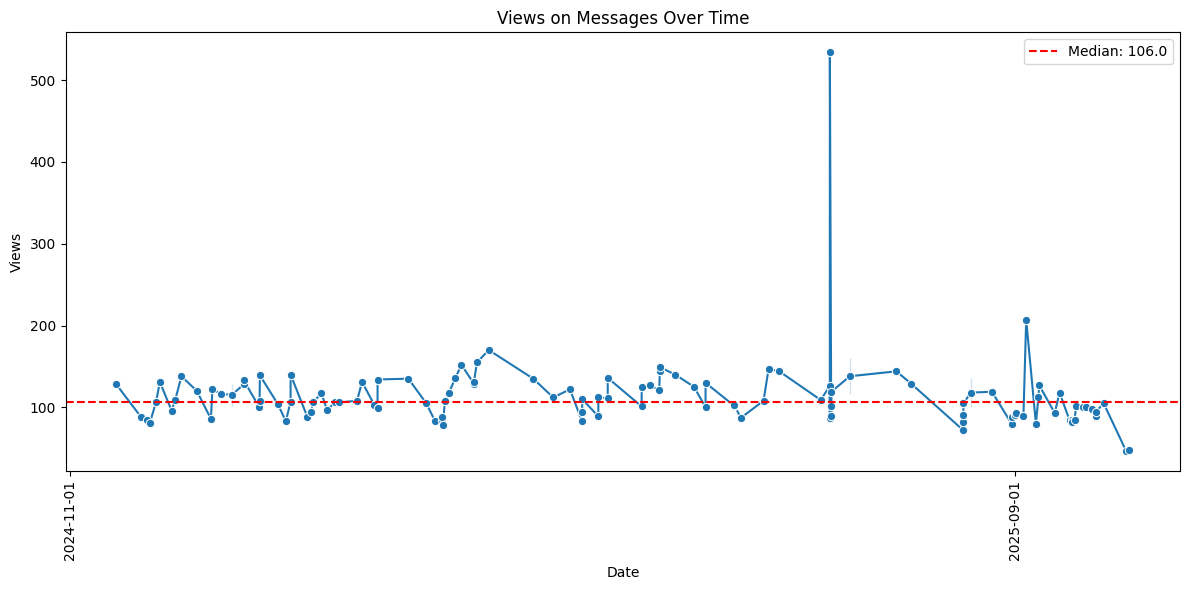

In [6]:
median_views = data['views'].median()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='views', data=data, marker='o')
plt.axhline(median_views, color='red', linestyle='--', label=f'Median: {median_views}')
plt.title('Views on Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(ticks=plt.gca().get_xticks()[::10], rotation=90)
plt.legend()
plt.tight_layout()

In [7]:
# find the message with the highest views
max_views = data['views'].max()
max_views_message = data[data['views'] == max_views]
print(f'Message with highest views:\n{max_views_message}')

Message with highest views:
                        date  \
81 2025-07-03 10:56:57+00:00   

                                                 text  views  \
81  видяшку смотреть ВСЕМ и ОБЯЗАТЕЛЬНО и это НЕ О...    534   

                                            media                  reactions  \
81  {'photos': [], 'documents': [], 'videos': []}  {'❤️': 6, '🍓': 3, '🕊': 1}   

    is_forwarded    month  
81         False  2025-07  


Самый просмотренный пост - это даже не само видео, а текст, который приглашает посмотреть его

In [8]:
# find top 10 messages with highest views
top_10_views = data.nlargest(10, 'views')
print(f'Top 10 messages with highest views:\n{top_10_views}')

Top 10 messages with highest views:
                         date  \
81  2025-07-03 10:56:57+00:00   
102 2025-09-04 15:32:21+00:00   
50  2025-03-15 16:21:15+00:00   
86  2025-07-09 22:01:51+00:00   
49  2025-03-11 21:37:24+00:00   
46  2025-03-06 20:48:08+00:00   
67  2025-05-09 17:50:15+00:00   
76  2025-06-13 17:51:35+00:00   
66  2025-05-09 17:48:33+00:00   
77  2025-06-17 04:22:43+00:00   

                                                  text  views  \
81   видяшку смотреть ВСЕМ и ОБЯЗАТЕЛЬНО и это НЕ О...    534   
102  - ну дай мне шанс…..\n- так ты же женишься\n- ...    207   
50   на последней фотографии мама, приятно вороша в...    170   
86   после вечеринки с бассейном под пошлую молли и...    160   
49   всем приятного аппетита\nпосле просмотра этого...    155   
46   кем я хотела стать когда вырасту\n(according t...    152   
67   ну друзья пошутили и хватит давайте внатуре по...    149   
76                  Когда, если не в пятницу, 13-го?))    147   
66   представьт

In [9]:
all_emojis = {}
for i in data['reactions']:
    if isinstance(i, str) and i.strip().startswith('{'):
        try:
            reactions = eval(i)
            if isinstance(reactions, dict):
                for k, v in reactions.items():
                    all_emojis[k] = all_emojis.get(k, 0) + int(v)
        except Exception:
            continue

all_emojis

{}

In [10]:
# add a column with total reactions
data['total_reactions'] = data['reactions'].apply(lambda x: sum(x.values()) if isinstance(x, dict) else 0)
data.head()

# calculate correlation between views and reactions
correlation = data['views'].corr(data['total_reactions'])
print(f'Correlation between views and total reactions: {correlation}')

Correlation between views and total reactions: -0.06813448476305632


In [11]:
# show top 10 reacted messages
top_10_reactions = data.nlargest(10, 'total_reactions')
print(f'Top 10 messages with highest reactions:\n{top_10_reactions}')

Top 10 messages with highest reactions:
                         date  \
99  2025-08-31 21:43:19+00:00   
111 2025-09-20 05:19:59+00:00   
101 2025-09-03 18:07:59+00:00   
102 2025-09-04 15:32:21+00:00   
48  2025-03-10 21:18:44+00:00   
116 2025-09-27 00:21:31+00:00   
109 2025-09-19 11:15:08+00:00   
2   2024-11-25 14:30:07+00:00   
4   2024-11-28 13:31:42+00:00   
32  2025-02-01 06:16:40+00:00   

                                                  text  views  \
99   лето выдалось не из лучших😬\nна удивление, жда...     91   
111  друзья спасибо ваши намерения и пожелания спас...     85   
101                 однажды это должно было случиться🥹     89   
102  - ну дай мне шанс…..\n- так ты же женишься\n- ...    207   
48   «мам, покажи че там у тебя в молодости было»\n...    131   
116                                             о море     89   
109                                 здрасьте приехали🫩     85   
2    пока солнце выкл греться приходится человеческ...     84   
4          

In [12]:
num_forwarded = data['is_forwarded'].sum()
print(f'Number of forwarded messages: {num_forwarded}')

Number of forwarded messages: 14


In [13]:
forwarded_messages = data[data['is_forwarded']]
forwarded_messages

,date,text,views,media,reactions,is_forwarded,month,total_reactions
3,2024-11-26 14:23:27+00:00,тетки первый курс вспомнили\n*первое видео обя...,81,"{'photos': [], 'documents': [], 'videos': ['ht...","{'❤️': 12, '🕊': 1}",True,2024-11,13
10,2024-12-16 05:34:44+00:00,потерпеть неделю и два экзамена потерпеть неде...,86,"{'photos': [], 'documents': [], 'videos': []}","{'🍓': 7, '❤️': 2, '💋': 1, '😭': 1}",True,2024-12,11
21,2025-01-09 08:58:44+00:00,NaN,83,"{'photos': ['""https://cdn4.telesco.pe/file/c0B...",{'🍓': 8},True,2025-01,8
29,2025-01-22 14:19:42+00:00,шизеем мощнейше,97,"{'photos': [], 'documents': [], 'videos': ['ht...","{'🍓': 8, '❤️': 2, '💋': 1}",True,2025-01,11
31,2025-01-26 14:28:13+00:00,"Иногда происходит момент, когда дыхание учащае...",106,"{'photos': ['""https://cdn4.telesco.pe/file/JVb...","{'❤️': 9, '💯': 3}",True,2025-01,12
36,2025-02-07 21:16:48+00:00,staskina magia utra + pivo s podruzkami vlog,134,"{'photos': [], 'documents': [], 'videos': ['ht...",{'🌭': 6},True,2025-02,6
42,2025-02-28 20:22:48+00:00,sneak peak into fashion design,78,"{'photos': ['""https://cdn4.telesco.pe/file/pXm...","{'❤️': 12, '🍓': 2, '🕊': 1}",True,2025-02,15
53,2025-04-05 10:17:33+00:00,ловите дропчик 😋😋😋,117,"{'photos': ['""https://cdn4.telesco.pe/file/Nfp...","{'🌭': 8, '❤️': 1}",True,2025-04,9
74,2025-06-04 18:47:15+00:00,не забываем смотрим каждый день перед сном и з...,87,"{'photos': [], 'documents': [], 'videos': ['ht...",{'❤️': 6},True,2025-06,6
76,2025-06-13 17:51:35+00:00,"Когда, если не в пятницу, 13-го?))",147,"{'photos': ['""https://cdn4.telesco.pe/file/iP4...","{'❤️': 8, '🤯': 3, '🕊': 2, '🍓': 1}",True,2025-06,14


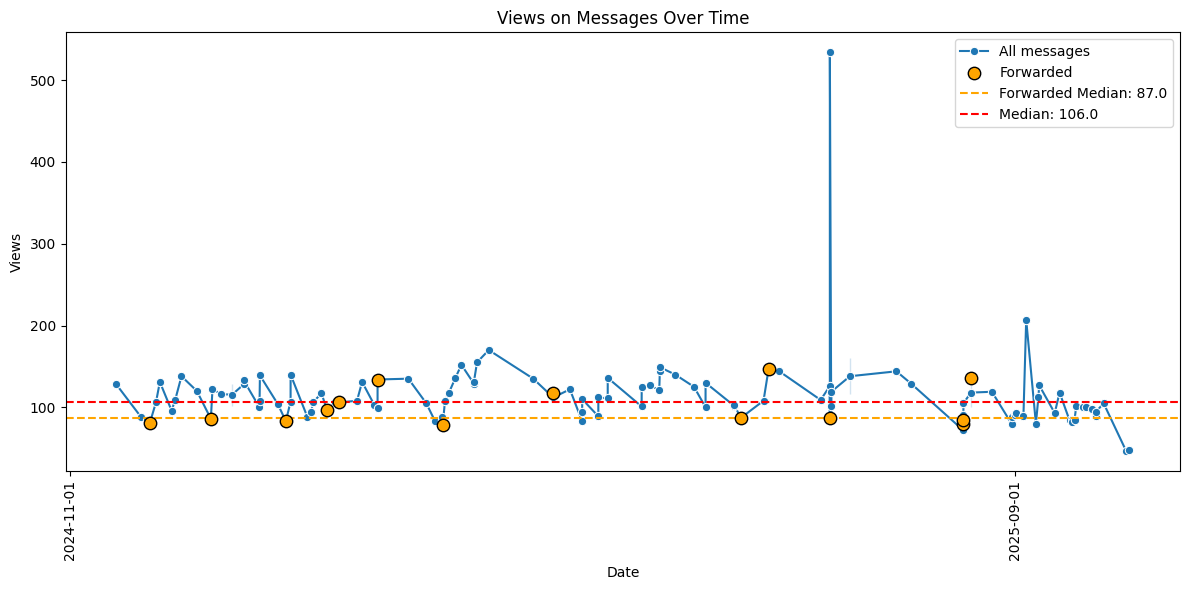

In [14]:
median_views = data['views'].median()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='views', data=data, marker='o', label='All messages')

# Highlight forwarded messages
forwarded = data[data['is_forwarded']]
plt.scatter(forwarded['date'], forwarded['views'], color='orange', s=80, label='Forwarded', zorder=5, edgecolor='black')

median_forwarded_views = forwarded['views'].median()
plt.axhline(median_forwarded_views, color='orange', linestyle='--', label=f'Forwarded Median: {median_forwarded_views}')

plt.axhline(median_views, color='red', linestyle='--', label=f'Median: {median_views}')
plt.title('Views on Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(ticks=plt.gca().get_xticks()[::10], rotation=90)
plt.legend()
plt.tight_layout()

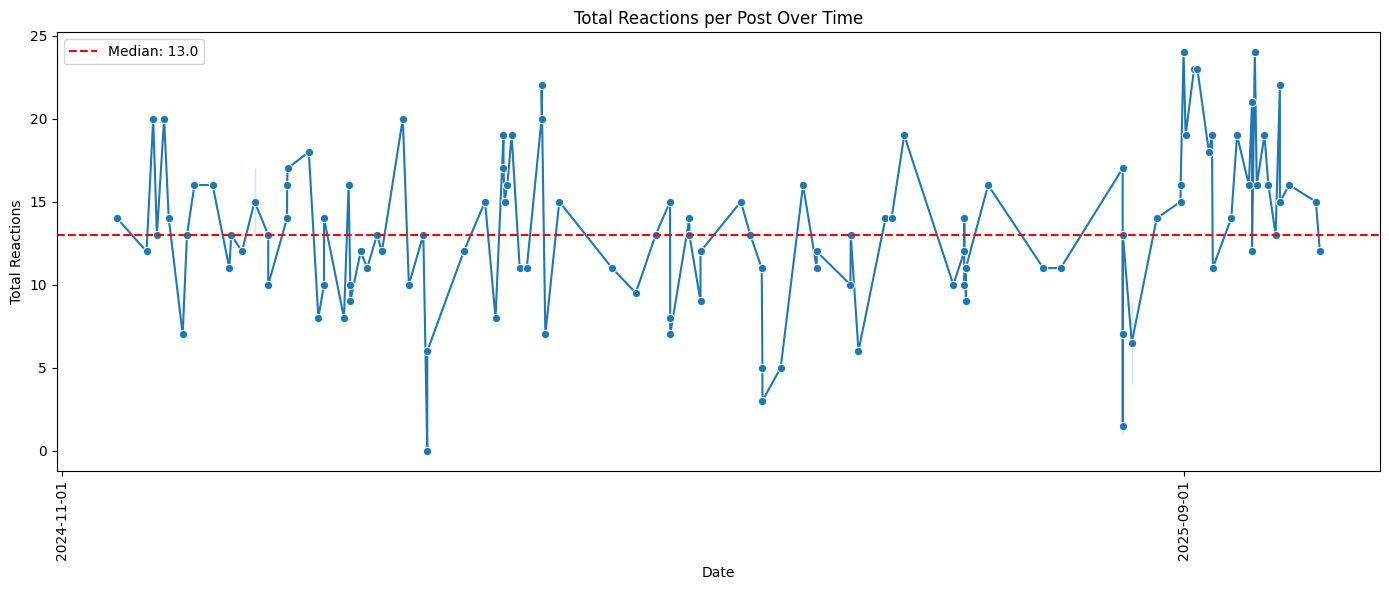

In [15]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='total_reactions', data=data, marker='o')
median_reactions = data['total_reactions'].median()
plt.axhline(median_reactions, color='red', linestyle='--', label=f'Median: {median_reactions}')
plt.title('Total Reactions per Post Over Time')
plt.xlabel('Date')
plt.ylabel('Total Reactions')
plt.xticks(ticks=plt.gca().get_xticks()[::10], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# find the message with the highest views
min_reactions = data['total_reactions'].min()
min_reactions_message = data[data['total_reactions'] == min_reactions]
print(f'Message with the least reactions:\n{min_reactions_message}')

Message with the least reactions:
                        date                    text  views  \
35 2025-02-07 21:16:47+00:00  а для чего жить-то еще     99   

                                            media reactions  is_forwarded  \
35  {'photos': [], 'documents': [], 'videos': []}        {}         False   

      month  total_reactions  
35  2025-02                0  
